### Exercise 1: Training a simple linear model

We do not know how to create a full neural network yet, by we know how to optimize a model.
We will try to solve a problem that consists in optimizing a simple model using an optimizer and the autograd.

Here is the physical problem:

* Let's consider a linear system characterized by a transmission matrix $\mathbf{H}$ (real) of size `n_out` $\times$ `n_in`.
* We send a collection of `n_inputs` random inputs, reprenseted by a matrix $\mathbf{X}$ of size `n_inputs` $\times$ `n_in`.
* We retrive the output corresponding to $\mathbf{Y} = \mathbf{X} \times \mathbf{H}^t$ of size `n_inputs` $\times$ `n_out`.
* We add a noise with a variance `noise_var` to $\mathbf{Y}$.

Because we know the system is fully described by a matrix $\mathbf{H}$, we will use a **network** with only one layer corresponding to a **dense layer** (i.e. one matrix multiplication, the coefficients being the parameters to be trained. 

Using the above example, create and train the system to find the correct matrix that correctly predict $\mathbf{Y}$.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

**Parameters**

In [2]:
# size of the system matrix
n_in, n_out = 6,10
# number of random input we use to estimate the response of the system
n_inputs = 25
# noise level (relative to the signal)
noise_var = 5e-2

**Generate data**

In [5]:
# transmission matrix
H = np.random.randn(n_out, n_in)

# inputs
X = np.random.randn(n_inputs, n_in)

# outputs
Y = X@H.transpose() 

# noise
noise = np.random.randn(*Y.shape)
noise *= np.linalg.norm(Y)/np.linalg.norm(noise)*noise_var

Y += noise

In [6]:
Y.shape

(25, 10)

**Convert data to PyTorch on `device`**

In [7]:
X_pt = torch.from_numpy(X).to(device).type(torch.float)
Y_pt = torch.from_numpy(Y).to(device).type(torch.float)
H_pt = torch.from_numpy(H).to(device).type(torch.float)

**Model**

A single dense layer (matrix multiplication).

Not deep learning!

In [13]:
model = torch.nn.Linear(n_in, n_out).to(device)

**Loss function and optimizer**

In [9]:
# create loss function
loss_fn = torch.nn.MSELoss(size_average=False) # Mean square error

learning_rate = 1e-2
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)


/opt/miniconda/envs/py38/lib/python3.8/site-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [10]:

for iteration in range(50):
    Y_pred = model(X_pt)
    loss = loss_fn(Y_pred,Y_pt)
    
    optimizer.zero_grad() # before the backpropagation!   
    # backward propagation done by autograd
    loss.backward()
    
    # update the parameters
    optimizer.step()
    
    if iteration % 5 == 0:
        print(f"iteration = {iteration}\t loss = {loss.item():.2e}")


iteration = 0	 loss = 2.16e+03
iteration = 5	 loss = 2.31e+01
iteration = 10	 loss = 5.89e+00
iteration = 15	 loss = 3.87e+00
iteration = 20	 loss = 3.53e+00
iteration = 25	 loss = 3.47e+00
iteration = 30	 loss = 3.46e+00
iteration = 35	 loss = 3.46e+00
iteration = 40	 loss = 3.46e+00
iteration = 45	 loss = 3.46e+00


**Retrieve the estimater matrix and show the result**

In [11]:
H_hat = model.weight.detach().cpu().numpy()
# use detach() to remove the tracking of gradient, do it once the calculation is done
# cpu() to copy it back to the cpu memory from the GPU
# numpy() to covert PyTorch tensor to numpy array

Text(0.5, 1.0, 'Estiamte matrix')

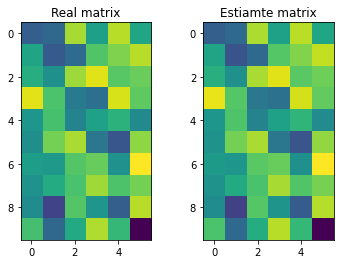

In [12]:
plt.figure()
plt.subplot(121)
plt.imshow(H)
plt.title('Real matrix')
plt.subplot(122)
plt.imshow(H_hat)
plt.title('Estiamte matrix')